<a href="https://colab.research.google.com/github/imnadiarasheed/ML/blob/main/Assign_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# inception_v3 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# define cnn model
def define_model():
  # load model
  model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
  # mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False
  # add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(1, activation='sigmoid')(class1)
  # define new model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  pyplot.tight_layout(pad=.5)
  pyplot.show()

87910968/87910968 [==============================] - 3s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
32/32 [==============================] - 609s 19s/step - loss: 14.2024 - accuracy: 0.5595 - val_loss: 0.6509 - val_accuracy: 0.6240
Epoch 2/10
32/32 [==============================] - 15s 455ms/step - loss: 0.6611 - accuracy: 0.6075 - val_loss: 0.6771 - val_accuracy: 0.5810
Epoch 3/10
32/32 [==============================] - 14s 448ms/step - loss: 0.6517 - accuracy: 0.6360 - val_loss: 0.6764 - val_accuracy: 0.6380
Epoch 4/10
32/32 [==============================] - 14s 448ms/step - loss: 0.6426 - accuracy: 0.6315 - val_loss: 0.6518 - val_accuracy: 0.6280
Epoch 5/10
32/32 [==============================] - 14s 447ms/step - loss: 0.6072 - accuracy: 0.6640 - val_loss: 0.6679 - val_accuracy: 0.6000
Epoch 6/10
32/32 [==============================] - 14s 447ms/step - loss: 0.5716 - accuracy: 

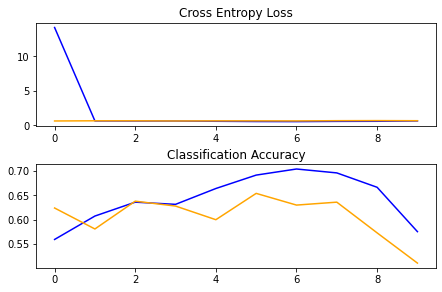

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
  # define model
  model = define_model()
  # create data generator
  datagen = ImageDataGenerator(featurewise_center=True)
  # specify imagenet mean values for centering
  datagen.mean = [123.68, 116.779, 103.939]
  # prepare iterator
  train_it = datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/ML/Assignment-4/Dataset/dogs-vs-cat-small/train/', 
  class_mode='binary', batch_size=64, target_size=(150, 150))
  vali_it = datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/ML/Assignment-4/Dataset/dogs-vs-cat-small/validation/', 
  class_mode='binary', batch_size=64, target_size=(150, 150))
  test_it = datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/ML/Assignment-4/Dataset/dogs-vs-cat-small/test/', 
  class_mode='binary', batch_size=64, target_size=(150, 150))

  # fit model
  history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=vali_it, validation_steps=len(vali_it), epochs=10, verbose=1)
  # evaluate model
  test_loss, test_acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
  print('Accuracy > %.3f' % (test_acc * 100.0))
  print('Loss > %.3f' % (test_loss * 100.0))
  # learning curves
  summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()